In [1]:
# import all the libraries for image processing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import data
from skimage.feature import Cascade
from skimage.filters import gaussian

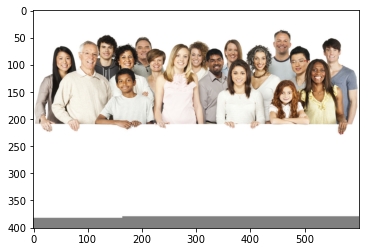

In [2]:
# read the jpg image with PILLOW
image = Image.open('data/group_of_people.png')
# convert PIL image to numpy array
image = np.array(image)
# change the dtype to float
image = image.astype(float)
# show the image with matplotlib
plt.imshow(image.astype('uint8'))

we need to first identify all the faces in the picture after that we want to burr the faces out


In [3]:
# load pre-trained the frontal face detection trained file from skimage
trained_file = data.lbp_frontal_face_cascade_filename()

# initialize the detector cascade
detector = Cascade(trained_file)

# detect the faces
detected = detector.detect_multi_scale(img = image,
                                      scale_factor=1.05,
                                      step_ratio=0.6,
                                      min_size=(30, 30),
                                      max_size=(50, 50))

In [4]:
# make a function that allow us to extract the face from the image

def getFace(d):
    '''
    Extract the detected face retangle from the image using the coorindates detected
    '''
    # get the x and y coorindates from detected
    x, y = d['r'], d['c']
    
    # get the width and height of the face retangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    
    # extract the detected face
    face = image[x:width, y:height]
    
    return face

# make a function to merge all the burried faces back to the image

def mergeBlurryFace(original, gaussian_face):
    # locate the x and y starting axies of the face rectangle
    x, y = d['r'], d['c']
    
    # get the width and height of the face retangle from detected
    width, height = d['r'] + d['width'], d['c'] + d['height']
      
    original[x:width, y:height] = gaussian_face
    
    
    return original


In [5]:
for d in detected:
        face = getFace(d)

        gaussian_face = gaussian(face, multichannel=True, sigma=6)

        image = mergeBlurryFace(image, gaussian_face)
    

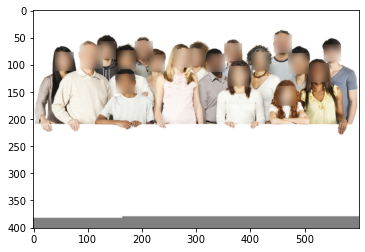

In [6]:
plt.imshow(image.astype('uint8'))